In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [3]:
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv",encoding = 'latin')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [27]:
data.shape

(267, 11)

### Renaming Column names

In [4]:
#Renaming the columns names

new_col_names = {'Region': 'State',
                 ' Date': 'Date',' Frequency': 'Frequency',
                 ' Estimated Unemployment Rate (%)': 'Unemp_Rate_per',
                 ' Estimated Employed': 'Employed',
                 ' Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate_per',"Region.1":"Region"}

data.rename(columns=new_col_names,inplace=True)  
data.head()

,State,Date,Frequency,Unemp_Rate_per,Employed,Labour_Participation_Rate_per,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
data.isnull().sum() # no null values

State                            0
Date                             0
Frequency                        0
Unemp_Rate_per                   0
Employed                         0
Labour_Participation_Rate_per    0
Region                           0
longitude                        0
latitude                         0
dtype: int64

In [7]:
data.duplicated().sum()  # no duplicates

0

### Creating Month column by extracting from Date column 

In [8]:
data["Month"] = pd.to_datetime(data["Date"]).dt.month
data.head()

,State,Date,Frequency,Unemp_Rate_per,Employed,Labour_Participation_Rate_per,Region,longitude,latitude,Month
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,5


### Creating Month_name column  by giving Month names

In [32]:
Month_dict = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"}
for i in data["Month"]:
    data.loc[data["Month"]== i,"Month_name"] = Month_dict[i]
data.head()

,State,Date,Frequency,Unemp_Rate_per,Employed,Labour_Participation_Rate_per,Region,longitude,latitude,Month,Month_name
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


# EDA and Data Visualization

## State Analysis

### Average Estimated Employed Each State 

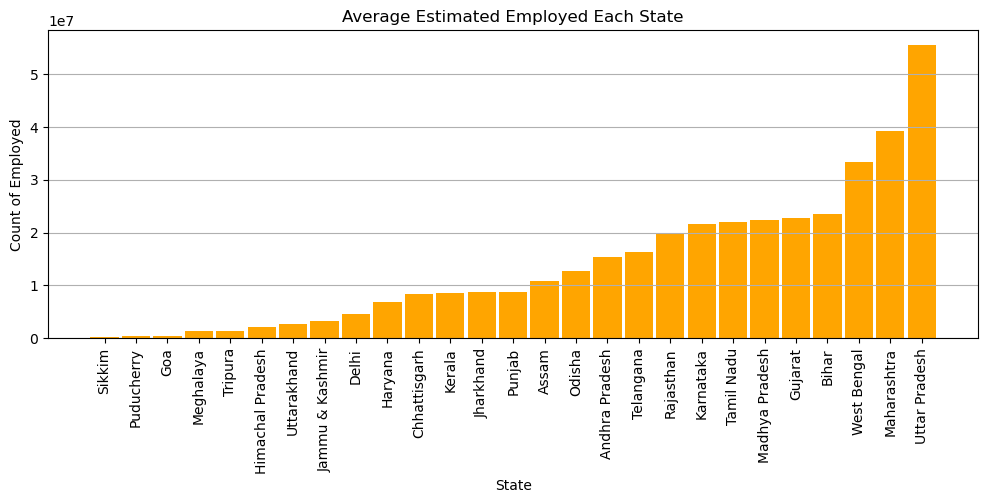

In [10]:
est_emp = data.groupby(["State"])["Employed"].mean().reset_index().sort_values(by = "Employed")
plt.figure(figsize=(12,4))
plt.bar(x = est_emp["State"],height = est_emp["Employed"],width=0.9,color = "orange")
plt.xticks(rotation = 90)
plt.grid(axis='y')
plt.xlabel("State")
plt.ylabel("Count of Employed")
plt.title("Average Estimated Employed Each State")
plt.show()

From above we can observe that
1.Uttar Pradesh has the highest employment, followed by Maharashtra,West Bengal and Bihar
2.Sikkim has the least Employemnt,followed by Puducherry and Goa

### Average Unemployment rate and Labour Participation Rate Each State 

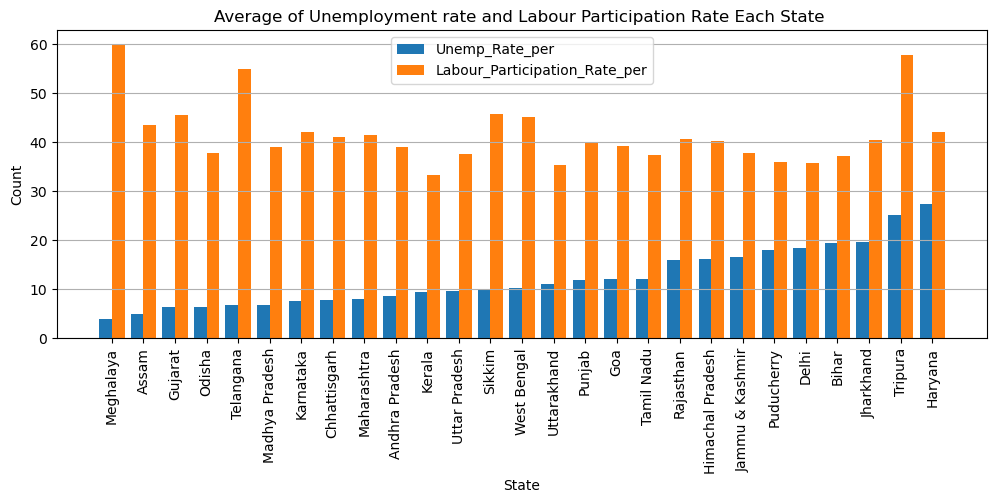

In [12]:
ex = data.groupby(["State"])["Unemp_Rate_per","Labour_Participation_Rate_per"].mean().reset_index().sort_values(by = ["Unemp_Rate_per","Labour_Participation_Rate_per"])
plt.figure(figsize=(12,4))
xpositions = np.arange(len(ex["State"]))
plt.bar(x= xpositions,height=ex["Unemp_Rate_per"],width =0.4,label = "Unemp_Rate_per")
plt.bar(x = xpositions+0.4,height=ex["Labour_Participation_Rate_per"],width =0.4,label = "Labour_Participation_Rate_per")
plt.xticks(ticks=xpositions+0.4/2,labels=ex["State"],rotation=90)
plt.grid(axis='y')
plt.title("Average of Unemployment rate and Labour Participation Rate Each State ")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend()
plt.show()

From Above we ca observe that
1.Meghalaya has the highest Labour participation Rate where as kerala has least
2.Haryana has the highest Unemployment Rate where as Meghalaya has least

## Month-wise Analysis

### Average of Employed Each Month

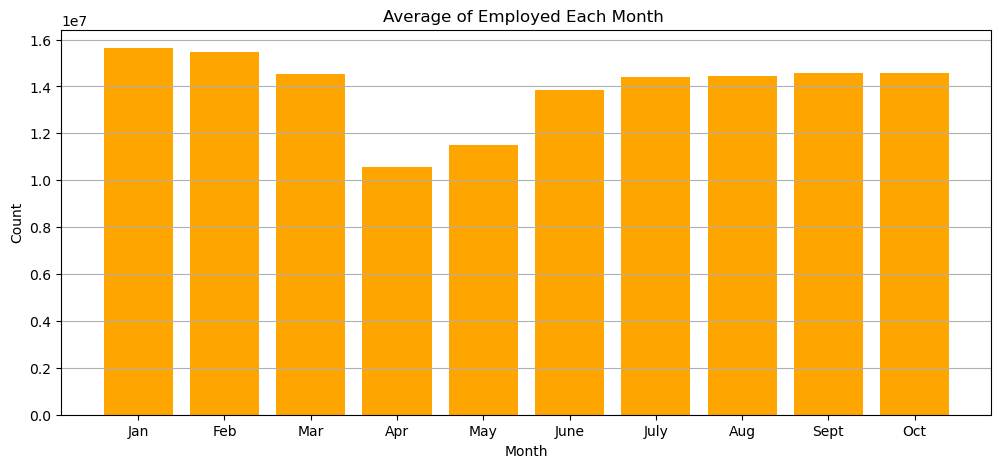

In [14]:
Mnth_data = data.groupby(["Month","Month_name"])["Employed","Unemp_Rate_per"].mean().reset_index()
plt.figure(figsize=(12,5))
plt.bar(x=Mnth_data["Month_name"],height=Mnth_data["Employed"],color = "orange")
plt.title("Average of Employed Each Month ")
plt.grid(axis='y')
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

Employment consistent in  january and febraury and decreased from march due to covid and least noticed in April month.
Later Employment gradually increased from May


### Average of Unemployment rate Each Month

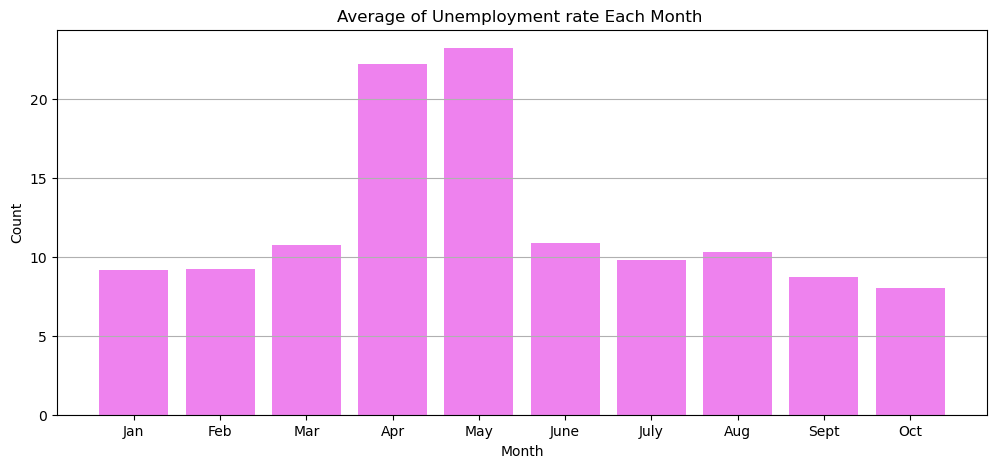

In [16]:
plt.figure(figsize=(12,5))
plt.bar(x=Mnth_data["Month_name"],height=Mnth_data["Unemp_Rate_per"],color ="violet")
plt.title("Average of Unemployment rate Each Month ")
plt.grid(axis='y')
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

Unemployment consistent in  january and febraury and increased from march due to covid and highest noticed in April month.
Later unemployment gradually decreased from May

### Unemployment rate from Jan 2020 to Oct 2020(Region)

In [38]:
fig = px.bar(data,x='Region',y='Unemp_Rate_per',animation_frame='Month',color='Region',
            title='Unemployment rate from Jan 2020 to Oct 2020(Region)',template='ggplot2')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### Unemployment rate from Jan 2020 to Oct 2020(State)

In [40]:
fig = px.bar(data,x='State',y='Unemp_Rate_per',animation_frame='Month',color='State',
            title='Unemployment rate from Jan 2020 to Oct 2020(State)',template='ggplot2')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

## Region-wise Analysis

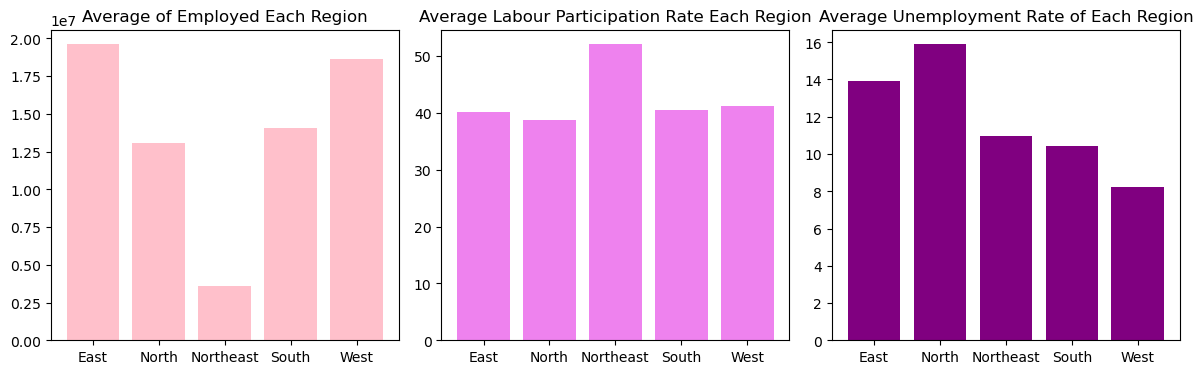

In [18]:
Region_data = data.groupby(["Region"])["Employed","Unemp_Rate_per","Labour_Participation_Rate_per"].mean().reset_index()

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, constrained_layout = True,figsize = (12,4))
ax1.bar(Region_data["Region"],Region_data["Employed"],color ="pink")
ax1.set_title('Average of Employed Each Region')

ax2.bar(Region_data["Region"],Region_data["Labour_Participation_Rate_per"],color ="violet")
ax2.set_title('Average Labour Participation Rate Each Region')

ax3.bar(Region_data["Region"],Region_data["Unemp_Rate_per"],color ="purple")
ax3.set_title('Average Unemployment Rate of Each Region')

plt.tight_layout()
plt.show()

1.Emploment highest in East region where as least in North-east
2.Labour participation rate highest in North-east region where as least in North
1.Unmploment highest in North region where as least in West

In [28]:
ex= data.groupby(["Region","State"])["Unemp_Rate_per","Labour_Participation_Rate_per","Employed"].mean().reset_index()

fig = px.sunburst(ex, path=['Region', 'State'], values='Unemp_Rate_per',color_continuous_scale='Plasma', 
                  title='Unemployment rate in each region and state',height=650,template='ggplot2')
fig.show()

## Before and After Covid Analysis

In [29]:
before_covid_data = data[(data["Month"] >= 1) & (data["Month"] <= 3)]
after_covid_data = data[(data["Month"] >= 4) & (data["Month"] <= 7)]

### Average Unemployment Rate Before and After covid in Each Region

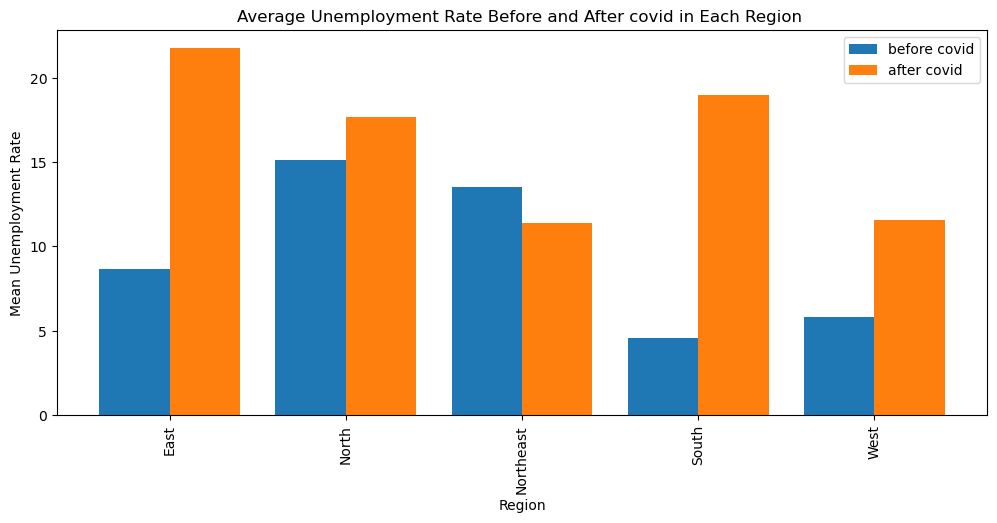

In [22]:
after_covid = after_covid_data.groupby("Region")["Unemp_Rate_per"].mean().reset_index()
before_covid = before_covid_data.groupby("Region")["Unemp_Rate_per"].mean().reset_index()
covid_data = before_covid
covid_data["after_covid_unemp_rate"] = after_covid["Unemp_Rate_per"]
covid_data
plt.figure(figsize=(12,5))
xpositions = np.arange(len(covid_data["Region"]))
plt.bar(x =xpositions,height = covid_data["Unemp_Rate_per"],width =0.4,label = "before covid")
plt.bar(x =xpositions+0.4,height = covid_data["after_covid_unemp_rate"],width =0.4,label = "after covid")
plt.xticks(ticks=xpositions+0.4/2,labels=covid_data["Region"],rotation = 90)
plt.title("Average Unemployment Rate Before and After covid in Each Region ")
plt.xlabel("Region")
plt.ylabel("Mean Unemployment Rate")
plt.legend()
plt.show()

Unemployment rate is high after covid due to lockdown in every region except Northeastern region

### Change in Unemployment Rate Each State

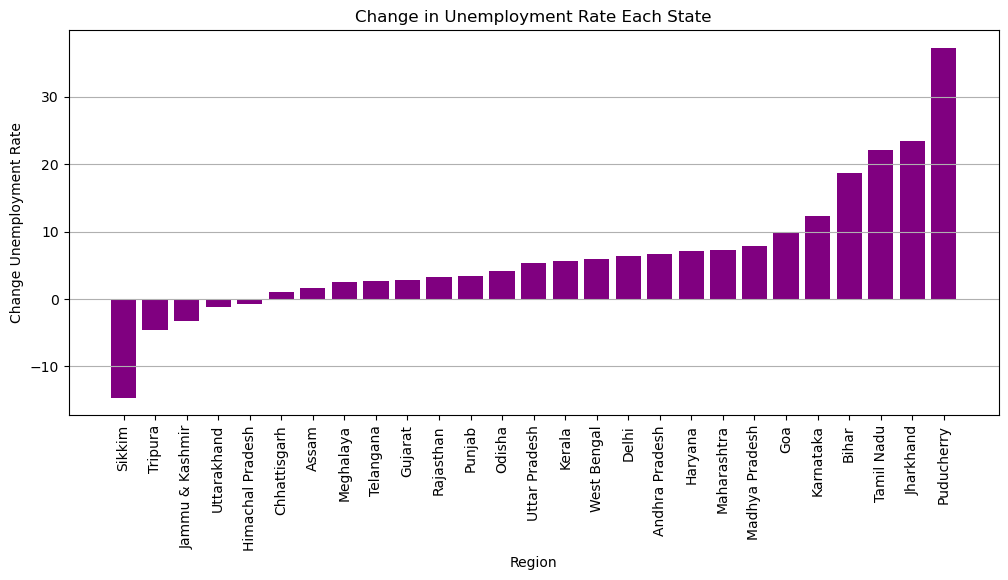

In [31]:
after_covid = after_covid_data.groupby("State")["Unemp_Rate_per"].mean().reset_index()
before_covid = before_covid_data.groupby("State")["Unemp_Rate_per"].mean().reset_index()
covid_data = before_covid
covid_data["after_covid_unemp_rate"] = after_covid["Unemp_Rate_per"]
covid_data["Change_in_unemp_rate"] = covid_data["after_covid_unemp_rate"] - covid_data["Unemp_Rate_per"] 
covid_data = covid_data.sort_values(by = "Change_in_unemp_rate")
covid_data
plt.figure(figsize=(12,5))
plt.bar(x =covid_data["State"],height = covid_data["Change_in_unemp_rate"],color = "purple")
plt.xticks(rotation = 90)
plt.grid(axis='y')
plt.title("Change in Unemployment Rate Each State")
plt.xlabel("Region")
plt.ylabel("Change Unemployment Rate")
plt.show()

From above we can observe that unemployment rate increased fue to lockdown,
unemployment increased in highest in Puducherry,followed by Jharkhand and tamil nadu
where as unemployment decreased in Highest in Sikkim, followe by tripura, jammu & kashmir,uttarakhand and Himachal Pradesh
significant  change not appeared in Assam,Meghalaya